# t-SNE visualization

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
DATASET_PATH = '../data/randomsplit/train/'


float_numbers = [
    '4903052',
    '4903054',
    '4903058',
    '4903215',
    '4903217',
    '4903218',
    '4903220'
]

float_number = float_numbers[4]

# QUERY_STRATEGY = 'random'
QUERY_STRATEGY = 'uncertainty'
# QUERY_STRATEGY = 'consensus-entropy'

RESULT_PATH = f"../results/randomsplit/{float_number}/{QUERY_STRATEGY}"


n_initial = 300
k = 1  # Number of samples to query at each iteration
split_method = 'random'
# split_method = 'ocsvm'
# split_method = 'lof'

In [7]:
TSNE_PATH = 'tsne'
os.makedirs(TSNE_PATH, exist_ok=True)

### Load data

In [10]:
# Load pre-generated t-SNE features
tsne_file = os.path.join(DATASET_PATH, 'tsne_features', f'PR_PF_{float_number}.npy')
tsne_features = np.load(tsne_file)
print(float_number)

# Load data
raw_data = pd.read_csv(os.path.join(DATASET_PATH, f'PR_PF_{float_number}.csv'))
# data = raw_data[:100]
data = raw_data

initial_data = pd.read_csv(os.path.join(DATASET_PATH, f'{split_method}_PR_PF_{float_number}_{n_initial}_initial.csv'))


4903217


FileNotFoundError: [Errno 2] No such file or directory: '../data/randomsplit/train/random_PR_PF_4903217_300_initial.csv'

### Plot the training set

-------- 4903217 --------


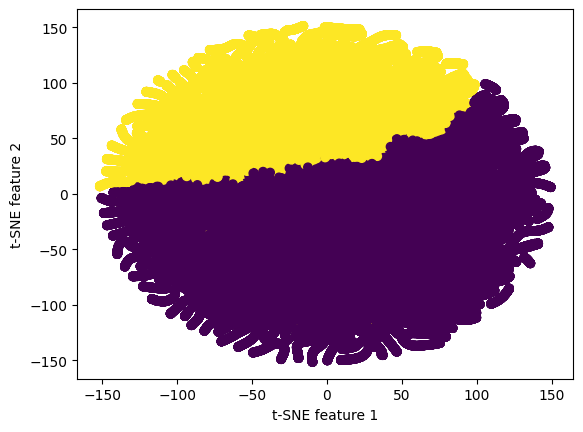

In [11]:
# Visualize the data
print(f'-------- {float_number} --------')
target = data['Label']
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=target)
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()


### Plot t-SNE features for selected samples

In [293]:
def flatten_list_of_lists(lst):
    flattened_list = [item for sublist in lst for item in sublist]
    return flattened_list

# Example list of lists
nested_list = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

# Flatten the list
flattened = flatten_list_of_lists(nested_list)
print(flattened)


[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [294]:
# Generate N random samples to represent the whole population
import random

# Number of random integers to generate
N = 10000

# Generate N random integers within the range of data_length
random_indices = random.sample(range(len(tsne_features)), N)
initial_indices = initial_data.index.to_list()

In [295]:
def get_tsne_df(data, tsne_features, indices): 
    labels = data.iloc[indices]['Label']
    feature1 = tsne_features[indices, 0]
    feature2 = tsne_features[indices, 1]
    # Create a DataFrame from the features and labels
    df = pd.DataFrame({'feature1': feature1,
                        'feature2': feature2,
                        'Label': labels})
    return df
    

/home/na/miniconda3/envs/data-quality-gpu/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Figure size 600x600 with 0 Axes>

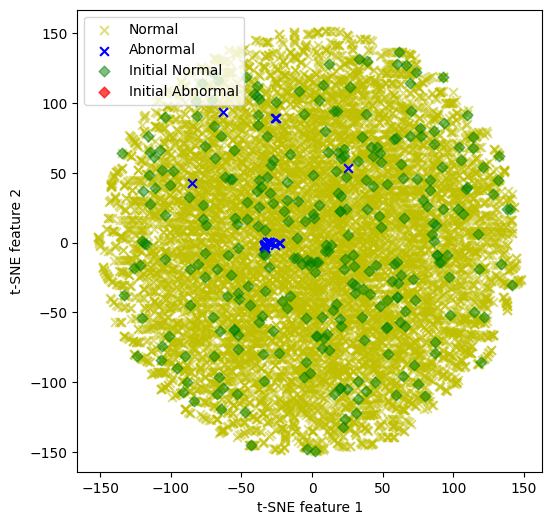

FileNotFoundError: [Errno 2] No such file or directory: '../results/randomsplit/4903054/uncertainty/KNN_ocsvm_300_initial_1_k.csv'

In [296]:
import ast 

model_names = ['KNN', 'XGBoost', 'CatBoost', 'LightGBM']
# model_names = ['XGBoost']
f1_scores = []
if QUERY_STRATEGY == 'consensus-entropy': 
    model_names = ['+'.join(model_names)]

# Visualize the train data
plt.figure(figsize=(6, 6))
tsne_df_random = get_tsne_df(data, tsne_features, random_indices)    
random_normal = tsne_df_random.loc[tsne_df_random['Label']==0]
random_abnormal = tsne_df_random.loc[tsne_df_random['Label']==1]
ax1 = random_normal.plot.scatter(x='feature1', y='feature2', c='y', marker='x', s=40, alpha=0.5, label='Normal', figsize=(6,6))
random_abnormal.plot.scatter(x='feature1', y='feature2', c='b', marker='x', s=40, alpha=1, label='Abnormal', ax=ax1)

# Visualize the initial data
tsne_df_initial = get_tsne_df(initial_data, tsne_features, initial_indices)    
initial_normal = tsne_df_initial.loc[tsne_df_initial['Label']==0]
initial_abnormal = tsne_df_initial.loc[tsne_df_initial['Label']==1]
initial_normal.plot.scatter(x='feature1', y='feature2', c='g', marker='D', s=30, alpha=0.5, label='Initial Normal', ax=ax1)
initial_abnormal.plot.scatter(x='feature1', y='feature2', c='r', marker='D', s=30, alpha=0.7, label='Initial Abnormal', ax=ax1)
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.legend()
plt.show()

for model_name in model_names:
    # Load result data
    result_data = pd.read_csv(os.path.join(RESULT_PATH, f"{model_name}_{split_method}_{n_initial}_initial_{k}_k.csv"))

    selected_ids = flatten_list_of_lists(result_data['query_ids'].apply(lambda x: ast.literal_eval(x)).to_list())

    # Select rows with matching IDs
    selected_data = data[data['ID'].isin(selected_ids)]
    selected_indices = selected_data.index.to_list()

    print(f'========== Float:{float_number}   Model:{model_name}   Initial:{n_initial}   K:{k} ==========')
    label_map = {0: 'Normal', 1: 'Abnormal'}
    label_set = {0, 1}


    # # Save the figure
    # figure_file = f'{TSNE_PATH}/{QUERY_STRATEGY}_{float_number}_{model_name}_{n_initial}_initial_{k}_k_BEFORE.png'
    # plt.savefig(figure_file, dpi=300, bbox_inches='tight')


    # Visualize the selected data
    ax2 = random_normal.plot.scatter(x='feature1', y='feature2', c='y', marker='x', s=40, alpha=0.5, label='Normal', figsize=(6,6))
    random_abnormal.plot.scatter(x='feature1', y='feature2', c='b', marker='x', s=40, alpha=1, label='Abnormal', ax=ax2)

    tsne_df_selected = get_tsne_df(data, tsne_features, selected_indices)
    selected_normal = tsne_df_selected.loc[tsne_df_selected['Label']==0]
    selected_abnormal = tsne_df_selected.loc[tsne_df_selected['Label']==1]
    selected_normal.plot.scatter(x='feature1', y='feature2', c='g', marker='o', s=30, alpha=0.5, label='Queried Normal', ax=ax2)
    selected_abnormal.plot.scatter(x='feature1', y='feature2', c='r', marker='o', s=30, alpha=0.7, label='Queried Abnormal', ax=ax2)
    plt.xlabel('t-SNE feature 1')
    plt.ylabel('t-SNE feature 2')
    plt.legend()
    plt.show()


    # # Save the figure
    # figure_file = f'{TSNE_PATH}/{QUERY_STRATEGY}_{float_number}_{model_name}_{n_initial}_initial_{k}_k_AFTER.png'
    # plt.savefig(figure_file, dpi=300, bbox_inches='tight')

    print(f'# anomalies: {len(selected_abnormal)}')
    print(f"F1 score: {result_data.iloc[-1]['F1-score'].round(4)}")
    f1_scores.append(result_data.iloc[-1]['F1-score'])



In [ ]:
f1_scores

[0.0, 0.0, 0.0149253731343283, 0.0148148148148148]

In [ ]:
np.array(f1_scores).mean().round(4)

0.0074